In [1]:
import pandas as pd
import numpy as np

df2 = pd.read_csv ('covid-variants.csv')
df = pd.read_csv ('covid-variants-area.csv')
df2 = pd.DataFrame(df2, columns= ['location','variant', 'num_sequences'])
df2 = df2.groupby(['location']).sum().reset_index()
df2.rename(columns={'num_sequences': 'Positive_Cases'}, inplace=True)
#print (df)
df.rename(columns={'Entity': 'location'}, inplace=True)
df = df.groupby(['location']).sum().reset_index()
#df2
#df.set_index('location')
#df2
joined_df = df.merge(df2, on='location', how='right')
print(joined_df.tail(49))
joined_df.shape

#joined_df_merge = df.merge(df2, how='left', left_index=True, right_index=True)
#print(joined_df_merge)

#grouped_df.reset_index(inplace=True)
#print(grouped_df)

                      location  Beta  Epsilon  Gamma  Kappa   Iota   Eta  \
64                       Malta     2        0     27      0      0    10   
65                      Mexico    19      491   2711      7     66     0   
66                  Montenegro     0        0      3      0      0     0   
67                     Morocco     0        0      0      0      0     0   
68                  Mozambique   286        0      0      0      0     0   
69                       Nepal     0        0      0      1      0     0   
70                 Netherlands   689        5    581     28      2    58   
71                 New Zealand     0        0      0      0      0     0   
72                     Nigeria     3        0      0      0      0   418   
73             North Macedonia     0        1      0      0      0     0   
74                      Norway   411        4     12      3      0   117   
75                        Oman     2        0      0      1      0     0   
76          

(113, 14)

In [297]:
X = pd.DataFrame(joined_df.drop(['location'], axis=1))
y = joined_df['location']
print(X)
print(y)
X.shape
y.shape

     Beta  Epsilon  Gamma  Kappa   Iota   Eta    Delta   Alpha  non_who  \
0     321        0      1      6      0    11      126     130      314   
1       1       39   2504      0     18     1      637     325     2128   
2       4       55    100      0    101     0     1612     545      307   
3      96       22      8    156      5    17    24770     612    15457   
4     268        0     34      1      2    15     6345    3557     2005   
5       7        0      1      8      0     0     2001      43       97   
6     413        0      1      0      0    19     1373      84     1199   
7    1122        1   2040     17      1    84    36100   21375     7145   
8       0        0     17      0      0     0       66      16       54   
9       0        0      0      0      0     0      319       0        0   
10    277        0      0      0      0     0     1190       0       81   
11     10        0  45629      0      0     1    26653    1037     7797   
12      3        0      0

(113,)

In [298]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=0)



In [299]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn import svm
clf = svm.SVC(kernel='linear')
# linear kernel computation
gram_train = np.dot(Xtrain, Xtrain.T)
clf.fit(gram_train, ytrain)
SVC(kernel='linear')
# predict on training examples
gram_test = np.dot(Xtest, Xtrain.T)
y_model=clf.predict(gram_test)

ytest
#y_model

105               Ukraine
10               Botswana
24     Dominican Republic
7                 Belgium
108         United States
56                Lebanon
63               Maldives
76               Pakistan
26                  Egypt
2                   Aruba
91               Slovakia
45                Ireland
54                 Kuwait
93           South Africa
104                Uganda
71            New Zealand
97               Suriname
16                  Chile
13               Cambodia
22                Denmark
84                Romania
89              Singapore
30                Finland
43                   Iran
8                  Belize
78               Paraguay
82               Portugal
60             Madagascar
3               Australia
Name: location, dtype: object

In [300]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)


0.0

array([[-2.20690162e-13, -2.76194560e-12, -2.59119173e-14, ...,
        -2.92948436e-14, -9.94500803e-12, -9.02291294e-15],
       [-9.57368676e-14, -1.01453333e-12, -1.28720743e-14, ...,
        -1.17488064e-14, -3.93386787e-12, -3.40134714e-15],
       [-7.35321055e-13, -5.91415887e-12, -1.26087720e-13, ...,
        -7.57413820e-14, -2.46607041e-11, -1.26942579e-14],
       ...,
       [ 2.06336080e-12,  1.08855246e-11,  4.20119784e-13, ...,
         1.84886228e-13,  5.52453432e-11,  7.87283504e-15],
       [ 1.16114331e-12,  8.60041442e-12,  2.08765101e-13, ...,
         1.16416437e-13,  3.73091969e-11,  1.67100654e-14],
       [ 2.62771955e-12,  2.83045747e-11,  3.73640157e-13, ...,
         3.07661478e-13,  1.06656036e-10,  8.16884919e-14]])

In [3]:
df = pd.read_csv ('COVID-19.csv')
df


,outcome,month,MMWR week,Week date,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR
0,case,04 - APR,14,Apr 04-Apr 10,12-17,all_types,4,19653,22165,10817618,20.353127,204.897233,10.067113,NaN,NaN,NaN
1,case,04 - APR,14,Apr 04-Apr 10,18-29,all_types,432,1406437,55217,19543208,30.715915,282.538056,9.198425,NaN,NaN,NaN
2,case,04 - APR,14,Apr 04-Apr 10,30-49,all_types,1176,3972493,71563,25934960,29.603576,275.932564,9.320920,NaN,NaN,NaN
3,case,04 - APR,14,Apr 04-Apr 10,50-64,all_types,1027,4140195,37287,14862743,24.805595,250.875629,10.113671,NaN,NaN,NaN
4,case,04 - APR,14,Apr 04-Apr 10,65-79,all_types,1169,8933954,10748,4897480,13.084912,219.459804,16.771974,NaN,NaN,NaN
5,case,04 - APR,14,Apr 04-Apr 10,80+,all_types,554,3079783,2662,1744234,17.988280,152.617137,8.484254,NaN,NaN,NaN
6,case,04 - APR,14,Apr 04-Apr 10,all_ages_adj,Janssen,804,1333378,199642,77800243,60.297980,256.608453,4.255672,69.964080,253.988975,3.630277
7,case,04 - APR,14,Apr 04-Apr 10,all_ages_adj,Moderna,1144,9484658,199642,77800243,12.061584,256.608453,21.274855,22.818923,253.988975,11.130629
8,case,04 - APR,14,Apr 04-Apr 10,all_ages_adj,Pfizer,2337,10693589,199642,77800243,21.854216,256.608453,11.741829,25.936963,253.988975,9.792549
9,case,04 - APR,14,Apr 04-Apr 10,all_ages_adj,all_types,4362,21552515,199642,77800243,20.238937,256.608453,12.678949,25.666353,253.988975,9.895795


In [122]:
import matplotlib.pyplot as plt
import numpy as np


X = df.drop(['outcome', 'Vaccine product', 'Age group', 'month', 'Week date', 'Crude vax IR', 'Crude unvax IR', 'Crude IRR','Age adjusted vax IR', 'Age adjusted unvax IR', 'Age adjusted IRR', ], axis=1) 
y = df['outcome'] 
print(X)

     MMWR week  Vaccinated with outcome  Fully vaccinated population  \
0           14                        4                        19653   
1           14                      432                      1406437   
2           14                     1176                      3972493   
3           14                     1027                      4140195   
4           14                     1169                      8933954   
5           14                      554                      3079783   
6           14                      804                      1333378   
7           14                     1144                      9484658   
8           14                     2337                     10693589   
9           14                     4362                     21552515   
10          15                        3                        29567   
11          15                      499                      1691402   
12          15                     1357                      477

In [150]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=22)

In [151]:
print(y.head(10))

0    case
1    case
2    case
3    case
4    case
5    case
6    case
7    case
8    case
9    case
Name: outcome, dtype: object


In [163]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [164]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9846153846153847

In [188]:
print(y_model)

['death' 'case' 'case' 'case' 'death' 'case' 'death' 'case' 'case' 'death'
 'death' 'case' 'death' 'case' 'death' 'death' 'death' 'case' 'case'
 'death' 'death' 'case' 'death' 'case' 'case' 'case' 'case' 'death' 'case'
 'case' 'case' 'death' 'death' 'death' 'death' 'death' 'death' 'case'
 'death' 'death' 'death' 'death' 'death' 'death' 'case' 'case' 'case'
 'death' 'death' 'case' 'case' 'case' 'case' 'death' 'case' 'death'
 'death' 'death' 'death' 'case' 'case' 'case' 'case' 'case' 'death' 'case'
 'case' 'case' 'case' 'death' 'case' 'case' 'death' 'death' 'death'
 'death' 'case' 'case' 'death' 'death' 'case' 'death' 'death' 'case'
 'death' 'death' 'death' 'case' 'case' 'case' 'death' 'death' 'death'
 'case' 'case' 'death' 'death' 'case' 'case' 'case' 'death' 'case' 'case'
 'death' 'case' 'case' 'case' 'death' 'death' 'death' 'death' 'death'
 'death' 'death' 'case' 'death' 'death' 'death' 'death' 'death' 'case'
 'death' 'death' 'case' 'case' 'case' 'death' 'case' 'death' 'death']


In [166]:
xfit = np.linspace(-1, 11)

In [167]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [178]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=2,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)        

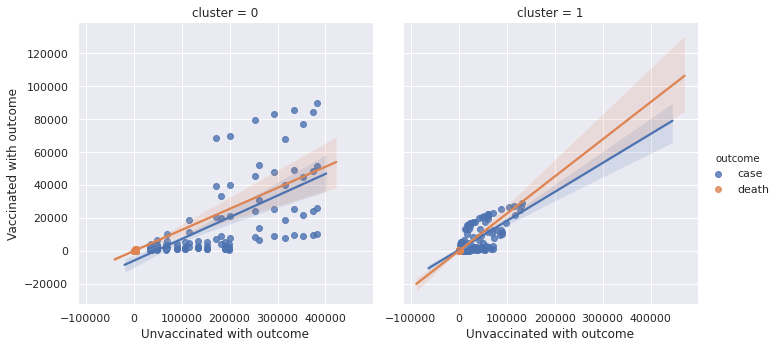

In [182]:
df['cluster'] = y_gmm
sns.lmplot("Unvaccinated with outcome","Vaccinated with outcome", data=df, hue='outcome',
           col='cluster', fit_reg=True);

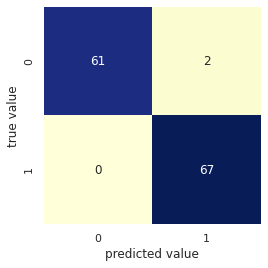

In [183]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='YlGnBu') #flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');

AttributeError: 'GaussianMixture' object has no attribute 'components_'